In [34]:
import re
import pandas as pd
import numpy as np
from scipy.spatial.distance import braycurtis, pdist, squareform
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sns

%cd ~/work/eggNOG/candidates

/nobackup1b/users/thiberio/eggNOG/candidates


In [2]:
jack_results = open('BH_index_hgt_results_raw_unique.txt', 'r').read()

In [15]:
constraints = [(324, 275), (324, 268), (324, 217), (313, 239), (324, 281), 
               (324, 240), (322, 246), (249, 328), (328, 294), (289, 329), 
               (274, 294), (290, 177), (218, 293), (293, 218), (295, 249), 
               (295, 274), (287, 177), (312, 328), (312, 329), (313, 331), 
               (318, 329), (321, 331), (322, 331), (324, 328), (324, 329), 
               (324, 331)]
models = ['UGAM BD', 'UGAM noBD', 'CIR BD', 'CIR noBD', 'LN BD', 'LN noBD']

In [5]:
len(constraints)

26

In [52]:
compatibility_matrix = [[]]
for count in re.findall('^Trees Passed: (\d+)$', jack_results, re.M):
    if len(compatibility_matrix[-1]) == len(constraints):
        compatibility_matrix.append([])
    
    compatibility_matrix[-1].append(int(count))

In [53]:
compatibility = pd.DataFrame(data=compatibility_matrix,
                             index=models)

In [54]:
compatibility

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
UGAM BD,1000,979,902,756,986,853,806,0,1000,763,...,11,22,343,782,0,524,277,0,42,653
UGAM noBD,1000,943,795,345,966,696,658,7,1000,999,...,49,168,910,928,0,481,206,4,312,701
CIR BD,10000,9724,7743,2569,10000,6965,3819,0,10000,10000,...,8596,124,9603,8693,0,4270,1042,0,6645,8185
CIR noBD,10000,9996,9379,6990,10000,9133,7751,0,10000,10000,...,9987,3201,9998,9922,0,9264,6519,54,9847,9926
LN BD,10000,8552,3564,519,10000,2863,1008,259,10000,10000,...,6113,538,9937,9649,0,6903,2640,4,9059,9507
LN noBD,10666,7106,1187,144,10666,1097,372,1168,10666,10666,...,7621,325,10568,10233,0,6685,2237,1,9483,10120


In [55]:
model_dist_df = pd.DataFrame(data   =squareform(pdist(compatibility, metric='braycurtis')),
                             index  =compatibility.index,
                             columns=compatibility.index)

In [57]:
model_dist_df.head()

,UGAM BD,UGAM noBD,CIR BD,CIR noBD,LN BD,LN noBD
UGAM BD,0.000000,0.089227,0.838340,0.866206,0.831120,0.843330
UGAM noBD,0.089227,0.000000,0.834763,0.862734,0.823765,0.832206
CIR BD,0.838340,0.834763,0.000000,0.136435,0.100246,0.137083
CIR noBD,0.866206,0.862734,0.136435,0.000000,0.174065,0.198260
LN BD,0.831120,0.823765,0.100246,0.174065,0.000000,0.062016


In [56]:
const_dist_df = pd.DataFrame(data   =squareform(pdist(compatibility.T, metric='braycurtis')))

In [58]:
const_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.067104,0.288302,0.580544,0.000563,0.327649,0.494954,0.934966,0.000000,0.002797,...,0.137108,0.813876,0.015555,0.029672,1.0,0.205373,0.535107,0.997051,0.093243,0.043714
1,0.067104,0.000000,0.225563,0.534253,0.066543,0.266403,0.442549,0.925957,0.067104,0.069737,...,0.085437,0.789913,0.071689,0.071490,1.0,0.140202,0.485434,0.996628,0.105657,0.080453
2,0.288302,0.225563,0.000000,0.350987,0.287786,0.043451,0.241049,0.885298,0.288302,0.289948,...,0.215937,0.686704,0.291195,0.264625,1.0,0.253728,0.349374,0.994668,0.283252,0.258658
3,0.580544,0.534253,0.350987,0.000000,0.580171,0.312299,0.120099,0.935722,0.580544,0.578687,...,0.529428,0.467805,0.585817,0.560528,1.0,0.437719,0.281719,0.988934,0.547173,0.554894
4,0.000563,0.066543,0.287786,0.580171,0.000000,0.327147,0.494529,0.934895,0.000563,0.003010,...,0.136556,0.813686,0.014992,0.029110,1.0,0.204834,0.534705,0.997048,0.092685,0.043153


In [60]:
constraint_linkage = sch.linkage(compatibility.T, method='complete', metric='braycurtis')
model_linkage      = sch.linkage(compatibility,   method='complete', metric='braycurtis')

In [61]:
model_tree_totals = [1_000, 1_000, 10_000, 10_000, 10_000, 10_666]

In [62]:
compatibility.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
UGAM BD,1000,979,902,756,986,853,806,0,1000,763,...,11,22,343,782,0,524,277,0,42,653
UGAM noBD,1000,943,795,345,966,696,658,7,1000,999,...,49,168,910,928,0,481,206,4,312,701
CIR BD,10000,9724,7743,2569,10000,6965,3819,0,10000,10000,...,8596,124,9603,8693,0,4270,1042,0,6645,8185
CIR noBD,10000,9996,9379,6990,10000,9133,7751,0,10000,10000,...,9987,3201,9998,9922,0,9264,6519,54,9847,9926
LN BD,10000,8552,3564,519,10000,2863,1008,259,10000,10000,...,6113,538,9937,9649,0,6903,2640,4,9059,9507


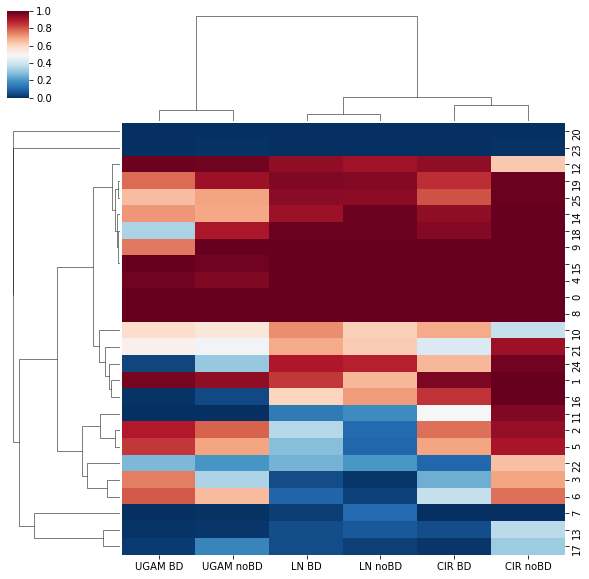

In [65]:
sns.clustermap(compatibility.T / model_tree_totals, 
               row_linkage=constraint_linkage, 
               col_linkage=model_linkage, 
               cmap='RdBu_r')

In [29]:
sns.clustermap?

Signature:
sns.clustermap(
    data,
    pivot_kws=None,
    method='average',
    metric='euclidean',
    z_score=None,
    standard_scale=None,
    figsize=None,
    cbar_kws=None,
    row_cluster=True,
    col_cluster=True,
    row_linkage=None,
    col_linkage=None,
    row_colors=None,
    col_colors=None,
    mask=None,
    **kwargs,
)
Docstring:
Plot a matrix dataset as a hierarchically-clustered heatmap.

Parameters
----------
data: 2D array-like
    Rectangular data for clustering. Cannot contain NAs.
pivot_kws : dict, optional
    If `data` is a tidy dataframe, can provide keyword arguments for
    pivot to create a rectangular dataframe.
method : str, optional
    Linkage method to use for calculating clusters.
    See scipy.cluster.hierarchy.linkage documentation for more information:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
metric : str, optional
    Distance metric to use for the data. See
    scipy.spatial.distance.pdi